In [1]:
from pathlib import Path
import pandas as pd
from singlefactorstats import SingleFactorDataHandler, Filter, SingleFactorStats

In [2]:
data_dir_path = Path(r"./input")
ts_daily_returns = pd.read_csv(data_dir_path / "ts_daily_returns.csv", index_col="Date")
ts_capsize = pd.read_csv(data_dir_path / "ts_capsize.csv", index_col="Date")
kospi200 = pd.read_excel(data_dir_path / "KOSPI200.xlsx", index_col="Date")
risk_free_rate = pd.read_excel(data_dir_path / "CD91일.xlsx", index_col="Date")
ts_per = pd.read_csv(data_dir_path / "PER(FY0).csv", index_col="Date")
ts_pbr = pd.read_csv(data_dir_path / "PBR(FY0).csv", index_col="Date")

In [4]:
import plotly.graph_objects as go

In [6]:
benchmark_daily_return = kospi200.pct_change()
benchmark_cumulative_return = (benchmark_daily_return + 1).cumprod() - 1
benchmark_cumulative_return

,Close
Date,
2000/01/04,NaN
2000/01/05,-0.073320
2000/01/06,-0.096214
2000/01/07,-0.108933
2000/01/10,-0.071450
...,...
2024/04/24,1.720335
2024/04/25,1.667290
2024/04/26,1.701032


In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=benchmark_cumulative_return['Close'].index, y=benchmark_cumulative_return['Close'].values, mode='lines', name='KOSPI200'))
fig.update_xaxes(
tickformat="%Y-%m-%d",
title='Date')
fig.show()

In [3]:
# container = list()
# container1 = list()
container2 = list()
TARGET_YEARS = [year for year in range(2009, 2010 + 1)]
for TARGET_YEAR in TARGET_YEARS:
    dataloader = SingleFactorDataHandler(ts_daily_returns, ts_pbr, TARGET_YEAR)
    ts_rets, pbr = dataloader()
    pbr_stats = SingleFactorStats(ts_rets, pbr, "PBR")
    container2.append(pbr_stats.get_same_weight_returns())  # 이름 바꾸기
    # container1.append(pbr_stats.get_same_weight_ts_prtf_returns())
    # container.append(pbr_stats.get_prtf_annual_returns())
    pbr_stats.show_annual_groups_returns()
    pbr_stats.show_annual_groups_stats()

In [4]:
bar = list()
for j in range(10):
    foo = list()
    for i in range(len(container2)):
        foo.append(container2[i][j])
    bar.append((pd.concat(foo) + 1).cumprod() - 1)

In [5]:
container2[0][0]

Date
2009-04-01    0.021675
2009-04-02    0.032280
2009-04-03    0.005203
2009-04-06    0.013629
2009-04-07    0.027539
                ...   
2010-03-25   -0.000703
2010-03-26    0.017040
2010-03-29   -0.009342
2010-03-30    0.000458
2010-03-31   -0.004968
Length: 253, dtype: float64

In [6]:
container2[1][0]

Date
2010-04-01   -0.001072
2010-04-02    0.000173
2010-04-05   -0.006473
2010-04-06    0.004938
2010-04-07    0.010852
                ...   
2011-03-25    0.001269
2011-03-28   -0.004372
2011-03-29   -0.002976
2011-03-30    0.005968
2011-03-31    0.009305
Length: 250, dtype: float64

In [7]:
(pd.concat([container2[0][0], container2[1][0]]) + 1).cumprod() - 1

Date
2009-04-01    0.021675
2009-04-02    0.054654
2009-04-03    0.060141
2009-04-06    0.074589
2009-04-07    0.104182
                ...   
2011-03-25    0.294205
2011-03-28    0.288547
2011-03-29    0.284713
2011-03-30    0.292380
2011-03-31    0.304406
Length: 503, dtype: float64

In [8]:
bar[0]

Date
2009-04-01    0.021675
2009-04-02    0.054654
2009-04-03    0.060141
2009-04-06    0.074589
2009-04-07    0.104182
                ...   
2011-03-25    0.294205
2011-03-28    0.288547
2011-03-29    0.284713
2011-03-30    0.292380
2011-03-31    0.304406
Length: 503, dtype: float64

In [13]:
bar[1]

Date
2009-04-01    0.018386
2009-04-02    0.047796
2009-04-03    0.050186
2009-04-06    0.070970
2009-04-07    0.091932
                ...   
2011-03-25    0.899255
2011-03-28    0.899889
2011-03-29    0.905933
2011-03-30    0.913823
2011-03-31    0.927641
Length: 503, dtype: float64

<AxesSubplot:>

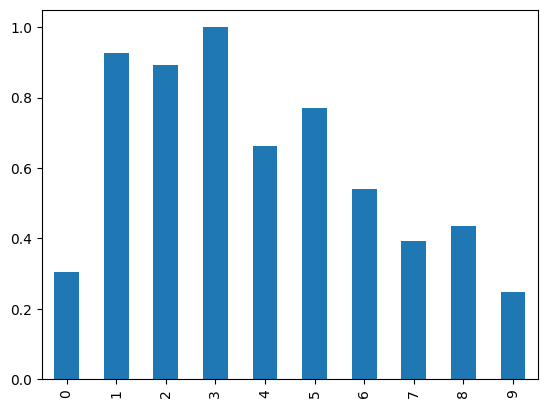

In [21]:
pd.Series([v[-1] for v in bar]).plot.bar()

In [9]:
container

[[0.2437824224774512,
  0.6855370657025648,
  0.6868181196584306,
  0.6475183730353729,
  0.44039572504893854,
  0.5776296258107165,
  0.4422965294667136,
  0.35501836762323435,
  0.4367387396699014,
  0.2977366096535423],
 [0.048741106756971186,
  0.14363636861052753,
  0.12187725148210227,
  0.21342377413104074,
  0.1547131227446017,
  0.12246051887364273,
  0.06882957880472085,
  0.02819788777432919,
  -0.0004587734854970549,
  -0.039296546912137575]]

In [11]:
(container[0][0] + 1) * (container[1][0] + 1)

1.304405754313869

In [12]:
(container[0][1] + 1) * (container[1][1] + 1)

1.9276414889785254

In [38]:
import plotly.graph_objects as go

In [31]:
factor_name = "PBR"

fig = go.Figure()
for i, ret in enumerate(bar):
    if i == 0 or i == 9:
        fig.add_trace(go.Scatter(x=ret.index, y=ret.values, mode='lines', name=f'{i + 1}분위'))
        fig.update_xaxes(
        tickformat="%Y-%m-%d",
        title='Date')
        fig.update_layout(title_text=f"{factor_name} 10분위 수익률",
                        title_x=0.5)
fig.show()